<a href="https://colab.research.google.com/github/raisaurabh44/Random_Forest_Iris_Dataset/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import pandas as pd
df = pd.DataFrame({'sepal_length':iris.data[:, 0],
                   'sepal_width': iris.data[:,1],
                   'petal_length':iris.data[:,2],
                   'petal_width':iris.data[:,3],
                   'species':iris.target})

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 342)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 342)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
23,5.1,3.3,1.7,0.5
140,6.7,3.1,5.6,2.4
41,4.5,2.3,1.3,0.3
94,5.6,2.7,4.2,1.3
137,6.4,3.1,5.5,1.8
...,...,...,...,...
139,6.9,3.1,5.4,2.1
68,6.2,2.2,4.5,1.5
4,5.0,3.6,1.4,0.2
84,5.4,3.0,4.5,1.5


In [ ]:
y_train

23     0
140    2
41     0
94     1
137    2
      ..
139    2
68     1
4      0
84     1
19     0
Name: species, Length: 112, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
hy_param = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}
clf = GridSearchCV(clf, param_grid = hy_param, cv = 5)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [ ]:
clf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_train, train_pred)

0.9553571428571429

In [ ]:
accuracy_score(y_test, test_pred)

1.0

In [ ]:
confusion_matrix(y_train, train_pred)

array([[34,  0,  0],
       [ 0, 37,  2],
       [ 0,  3, 36]])

In [ ]:
clf.predict([[3, 4, 2, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf.predict([[7,3,5,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.93      0.95      0.94        39
           2       0.95      0.92      0.94        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
clf=RandomForestClassifier(n_estimators = 100, max_depth = 3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
clf.feature_importances_

array([0.08862567, 0.02913619, 0.42465193, 0.45758622])

In [ ]:
fea_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending = False)

In [ ]:
fea_imp

petal width (cm)     0.457586
petal length (cm)    0.424652
sepal length (cm)    0.088626
sepal width (cm)     0.029136
dtype: float64

<Axes: xlabel='None', ylabel='None'>

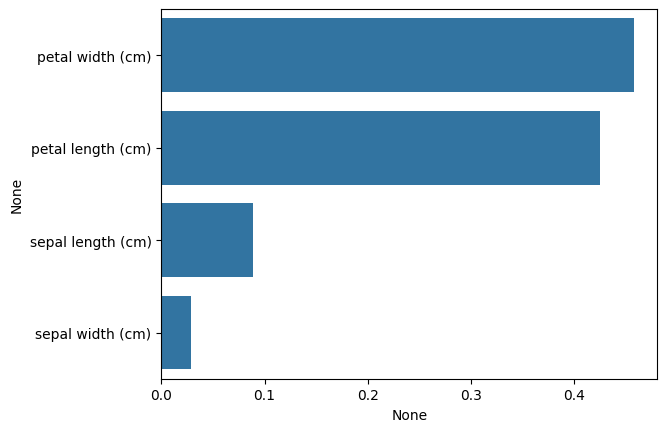

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = fea_imp, y=fea_imp.index)

In [ ]:
# KNN IMPUTATION --- impute null values